## Semester 1 Project Submission


## Students:
### Graham Costa
### Erin Lee
### Jack Pacheco
### Uma Sethuraman
### Jacky Rivera
## Instructors:
### JP Ventura 
### Julian Ward

# AI Academy Capstone Project

## Introduction:

Computing Vision is looking to enter the movie studio business. We have been tasked to utilize readily available data to determine trends in the movie industry, and formulate three business recommendations for them to follow if they decide to enter the movie studio industry.

## Project Goal

The goal for this project is to recommend three key business insights for the company Computing Vision passed on our Exploratory data analysis, data visualizations, and statistical inference



# Loading in python dependencies and packages for data manipulation and visualizations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
import zipfile
import sqlite3
from scipy import stats 

%matplotlib inline

# Begin loading in datasets and preparing for mergers

## Prepare data for merging by making sure the right types are in place and renaming columns for easier joining on index

Box office movies provides us with the domestic and foreign grosses for movies as well as the studios. Since we will be looking at profitability this is an important dataset to incorporate into our analysis.

In [2]:
movie_bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_bom = movie_bom.rename(columns={'title':"movie"})
movie_bom['movie'] = movie_bom['movie'].map(lambda x: "Harry Potter and the Deathly Hallows: Part 1" if x == "Harry Potter and the Deathly Hallows Part 1" else x)
movie_bom.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#pulling in movie budgets dataset and preparing it for joining by changing object types to int. 

## Load in The Number data set, cleanup column information and prepare for join
The Number dataset provides us valuable information regarding worldwide gross as well as the production budgets for the movies. Once again this will be valuable as we look into the financial impact of these things on the financial success of a potential studio. 

In [4]:
"""
Data was formulated as string with $ signs and commas, to merge, we needed to recode this into integer type
To do this we used lambda functions to recode over the specific columns and turn them into the proper
data frame typing. 
"""
moviebudgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
moviebudgets["production_budget"] = moviebudgets['production_budget'].map(lambda x: x.strip("$"))
moviebudgets["production_budget"] = moviebudgets['production_budget'].map(lambda x: x.replace(",", ""))

moviebudgets["domestic_gross"] = moviebudgets['domestic_gross'].map(lambda x: x.strip("$"))
moviebudgets["domestic_gross"] = moviebudgets['domestic_gross'].map(lambda x: x.replace(",",""))

moviebudgets["worldwide_gross"] = moviebudgets['worldwide_gross'].map(lambda x: x.strip("$"))
moviebudgets["worldwide_gross"] = moviebudgets['worldwide_gross'].map(lambda x: x.replace(",",""))


moviebudgets= moviebudgets.astype({'production_budget': np.int64, 'domestic_gross': np.int64, 'worldwide_gross': np.int64})
moviebudgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


# Join Box office movies and the numbers dataset on index movie

In [5]:
#joining movie budgets dataset with bom movie gross so we can have the studio names matched with production budget
# and worldwide gross

In [6]:
movie_total_gross = movie_bom.join(moviebudgets.set_index("movie"), on= ['movie'],rsuffix = "___")
movie_total_gross = movie_total_gross.set_index('id')
movie_total_gross

,movie,studio,domestic_gross,foreign_gross,year,release_date,production_budget,domestic_gross___,worldwide_gross
id,,,,,,,,,
47.0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN
38.0,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...
NaN,The Quake,Magn.,6200.0,NaN,2018,NaN,NaN,NaN,NaN
NaN,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN,NaN,NaN,NaN
NaN,El Pacto,Sony,2500.0,NaN,2018,NaN,NaN,NaN,NaN


In [7]:
movie_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [8]:
movie_tmdb= movie_tmdb.rename(columns={'original_title':"movie"})
movie_tmdb = movie_tmdb.set_index("movie")


## Pull in tmdb movie dataset and prepare for merger with the existing data frame
Another point of our analysis is success based on ratings, so we pulled in the TMDb ratings in order to investigate this
relationship.

In [9]:
#pullin in tmdb ratings so we have budget info and ratings 

In [10]:
movies_and_rating = movie_total_gross.join(movie_tmdb, on = 'movie', how = 'outer', lsuffix = '__')

In [11]:
movies_and_rating

,movie,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
47.0,Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,7.0,"[16, 10751, 35]",10193.0,en,24.445,2010-06-17,Toy Story 3,7.7,8340.0
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,0.0,"[12, 14, 10751]",12444.0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0
38.0,Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,4.0,"[28, 878, 12]",27205.0,en,27.920,2010-07-16,Inception,8.3,22186.0
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,38.0,"[35, 12, 14, 16, 10751]",10192.0,en,15.041,2010-05-16,Shrek Forever After,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26512.0,"[27, 18]",488143.0,en,0.600,2018-10-13,Laboratory Conditions,0.0,1.0
NaN,_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26513.0,"[18, 53]",485975.0,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1.0
NaN,The Last One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26514.0,"[14, 28, 12]",381231.0,en,0.600,2018-10-01,The Last One,0.0,1.0
NaN,Trailer Made,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26515.0,"[10751, 12, 28]",366854.0,en,0.600,2018-06-22,Trailer Made,0.0,1.0


In [12]:
#dropping unnecessary columns

## Continue to clean data by dropping unused and/or redundant columns 

In [13]:
movies_and_rating.drop(["Unnamed: 0",'id','title', 'genre_ids', 'title'],  axis=1, inplace=True)


In [14]:
movies_and_rating = movies_and_rating.set_index('movie')

In [15]:
movies_and_rating

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,en,24.445,2010-06-17,7.7,8340.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,en,33.533,2010-11-19,7.7,10788.0
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,en,27.920,2010-07-16,8.3,22186.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,en,15.041,2010-05-16,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-10-13,0.0,1.0
_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-05-01,0.0,1.0
The Last One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-10-01,0.0,1.0


In [16]:
#dropping movies that don't have enough information to be of use

## Dropping Na's from the dataset using 6 empty columns in a row as the threshold
We found that at this threshold we can complete the necessary calculations and visualizations with still enough datapoints. 
At a higher threshold there are a lot of entries that only have a couple columns worth of data and these were not valuable to the insights that we created

In [17]:
movies_and_rating.dropna(axis = 0, thresh = 6, inplace = True)

In [18]:
movies_and_rating

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,en,24.445,2010-06-17,7.7,8340.0
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,en,33.533,2010-11-19,7.7,10788.0
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,en,27.920,2010-07-16,8.3,22186.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,en,15.041,2010-05-16,6.1,3843.0
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,en,20.340,2010-06-23,6.0,4909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Loving Pablo,Uni.,22000.0,NaN,2018.0,NaN,NaN,NaN,NaN,es,12.937,2018-06-15,6.1,505.0
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,NaN,en,0.600,2015-08-14,7.0,1.0
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,NaN,en,1.176,2016-10-23,6.6,10.0


# Pulling in the IMDb ratings using SQL

## Merge the desired columns from the tables of interest and prepare for joinging into the master dataset

We also wanted to pull in IMDb for ratings so that we can compare the ratings between the two datasets to see if they are consistent or if there are discrepancies. 

In [19]:
"""
Pulling in the zipped IMDb database and setting up a cursor object to execute sqlite commands.
"""

with zipfile.ZipFile("zippedData/im.db.zip", 'r') as imdb_zip:
    imdb_zip.extractall("zippedData")
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [20]:
"""Creating pandas dataframes out of sql data bases"""
movie_basics = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

In [21]:
movie_ratings = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

In [22]:
#Merging the two sql databases into one larger pandas dataframe
merged = pd.merge(movie_ratings, movie_basics, on='movie_id')
merged = merged.rename(columns={'primary_title':"movie"})
merged = merged.set_index('movie')
merged

,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
movie,,,,,,,
Laiye Je Yaarian,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,Romance
Borderless,tt10384606,8.9,559,Borderless,2019,87.0,Documentary
Just Inès,tt1042974,6.4,20,Just Inès,2010,90.0,Drama
The Legend of Hercules,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
Até Onde?,tt1060240,6.5,21,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
Caisa,tt9805820,8.1,25,Caisa,2018,84.0,Documentary
Code Geass: Lelouch of the Rebellion - Glorification,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
Sisters,tt9851050,4.7,14,Sisters,2019,NaN,"Action,Drama"


In [23]:
master_df = movies_and_rating.join(merged, on = 'movie', how = 'outer', lsuffix = '__')

# Drop redundant columns for readability, and Create new columns of interest for calculations visualizations, and metrics

In [24]:
master_df.head()

,movie,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,original_language,...,release_date,vote_average,vote_count,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
Toy Story 3,Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,en,...,2010-06-17,7.7,8340.0,tt0435761,8.3,682218.0,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,en,...,2010-11-19,7.7,10788.0,tt0926084,7.7,425530.0,Harry Potter and the Deathly Hallows: Part 1,2010.0,146.0,"Adventure,Fantasy,Mystery"
Inception,Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,en,...,2010-07-16,8.3,22186.0,tt1375666,8.8,1841066.0,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
Shrek Forever After,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,en,...,2010-05-16,6.1,3843.0,tt0892791,6.3,167532.0,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy"
The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,en,...,2010-06-23,6.0,4909.0,tt1325004,5.0,211733.0,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy"


In [25]:
master_df.dropna(axis = 0, thresh = 9, inplace = True)

In [26]:
master_df = master_df.set_index("movie")

In [27]:
master_df.drop(["domestic_gross___",'movie_id','original_title', 'year', 'release_date__', "original_language"
                ,"release_date", "start_year","popularity"],  axis=1, inplace=True)

In [28]:
master_df["Total_Profit"] = (master_df.worldwide_gross - master_df.production_budget)
master_df["Profit%"] = ((master_df.Total_Profit)/master_df.production_budget)*100

In [29]:
master_df.shape

(2989, 13)

## Resulting dataset has 6,857 entries 
Limitations of this dataset are that they do not contain the entire population, there are missing values throughout that
would be challenging to fill so we have chosen to omit them when conducting statistical tesing and visualizations.


With any statistical analysis these pose risks for the validity of the conclusions, but given our sample size we feel we still have enough observations to determine trends among movies that can be reasonably representative of the population.

## Descriptive statistics for all features used in analysis
Since we are examining the profit percentage and audience ratings as forms of "Success" the remaining features in the dataset will be valuable in our suggestions and recommendations for the path that Computing Vision should take. 

In [30]:
master_df.describe() #descriptive statistics for all features used in analysis

,domestic_gross,production_budget,worldwide_gross,vote_average,vote_count,averagerating,numvotes,runtime_minutes,Total_Profit,Profit%
count,2.963000e+03,1.832000e+03,1.832000e+03,2912.000000,2912.000000,2875.000000,2.875000e+03,2816.000000,1.832000e+03,1832.000000
mean,4.085259e+07,4.430199e+07,1.471707e+08,6.335886,1463.480082,6.422504,7.511904e+04,105.346946,1.028687e+08,397.559993
std,7.884126e+07,5.432862e+07,2.295861e+08,1.018145,2469.254428,1.027241,1.349365e+05,19.138701,1.909069e+08,1298.706779
min,1.000000e+02,5.000000e+04,0.000000e+00,0.000000,1.000000,1.600000,5.000000e+00,3.000000,-1.104502e+08,-100.000000
25%,3.560000e+05,9.350000e+06,1.634077e+07,5.800000,87.000000,5.800000,2.686000e+03,93.000000,2.356955e+05,3.039258
50%,7.600000e+06,2.500000e+07,6.428288e+07,6.300000,474.000000,6.500000,2.177500e+04,103.000000,3.074923e+07,138.491752
75%,4.690000e+07,5.500000e+07,1.697664e+08,7.000000,1692.000000,7.100000,8.507300e+04,116.000000,1.181791e+08,343.904765
max,9.367000e+08,4.106000e+08,2.048134e+09,10.000000,22186.000000,9.200000,1.841066e+06,192.000000,1.748134e+09,41556.474000


# Runtime Visualizations

## Creating Bins for Runtime
There is a wide range of runtime so we wanted to condense them into a categorical variable to better examine trends in runtime based on ranges that we created of common movie durations. 

In [31]:
"""
Converting runtimes into runtime bins for common movie duration runtime intervals
"""
binned_df = master_df.copy()
bins = [90, 150, 210, 270] # bins of under 1.5 hours, 1.5-2.5 hours, 2.5-3.5 hours, 3.5+ hours
runtime_bins = []
for index, row in binned_df.iterrows():
    runtime = row['runtime_minutes']
    if runtime < bins[0]:
        runtime_bins.append(0)
    elif runtime < bins[1]:
        runtime_bins.append(1)
    elif runtime < bins[2]:
        runtime_bins.append(2)
    else:
        runtime_bins.append(3)
binned_df['runtime_bins'] = runtime_bins
binned_df[binned_df['runtime_bins'] == 0] # examples of runtimes under 1.5 hours

,studio,domestic_gross,foreign_gross,production_budget,worldwide_gross,vote_average,vote_count,averagerating,numvotes,runtime_minutes,genres,Total_Profit,Profit%,runtime_bins
movie,,,,,,,,,,,,,,
Gulliver's Travels,Fox,42800000.0,194600000,112000000.0,232017848.0,5.1,1282.0,4.9,61178.0,85.0,"Adventure,Comedy,Family",120017848.0,107.158793,0
Yogi Bear,WB,100200000.0,101300000,80000000.0,204774690.0,5.3,387.0,4.6,18934.0,80.0,"Adventure,Animation,Comedy",124774690.0,155.968362,0
Unstoppable,Fox,81600000.0,86200000,95000000.0,165720921.0,6.4,1913.0,4.3,551.0,65.0,Documentary,70720921.0,74.443075,0
Unstoppable,Fox,81600000.0,86200000,95000000.0,165720921.0,6.4,1913.0,8.1,8.0,84.0,Documentary,70720921.0,74.443075,0
Unstoppable,Fox,81600000.0,86200000,95000000.0,165720921.0,1.6,4.0,4.3,551.0,65.0,Documentary,70720921.0,74.443075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beast,RAtt.,800000.0,NaN,NaN,NaN,6.9,87.0,5.8,502.0,83.0,"Drama,Thriller",NaN,NaN,0
Beast,RAtt.,800000.0,NaN,NaN,NaN,6.9,87.0,5.7,13.0,60.0,"Drama,Mystery",NaN,NaN,0
Mountain,Greenwich,365000.0,NaN,NaN,NaN,7.9,25.0,7.2,2529.0,74.0,Documentary,NaN,NaN,0


## Average Rating vs. Runtime

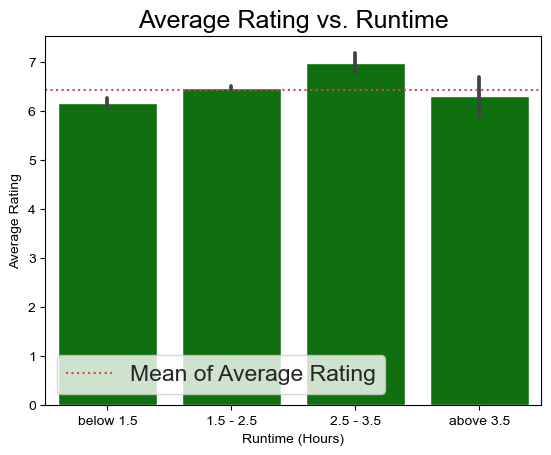

In [32]:
fix, ax = plt.subplots()
sns.set(rc={"figure.figsize":(10, 7)})
sns.set_theme(style="whitegrid", font_scale=1.5)
runtime_df = binned_df[binned_df['runtime_bins'] != 0]
plot = sns.barplot(data = binned_df, x = 'runtime_bins', y = 'averagerating',
                   color = 'green').set(title = 'Average Rating vs. Runtime')
ax.set_xticklabels(["below 1.5","1.5 - 2.5","2.5 - 3.5","above 3.5"])
ax.axhline(y = binned_df['averagerating'].mean(), color='r', 
               linestyle='dotted', label = "Mean of Average Rating")
ax.legend()
ax.set_xlabel("Runtime (Hours)")
ax.set_ylabel("Average Rating")
plt.show()

## Average Profit Percentage vs. Runtime

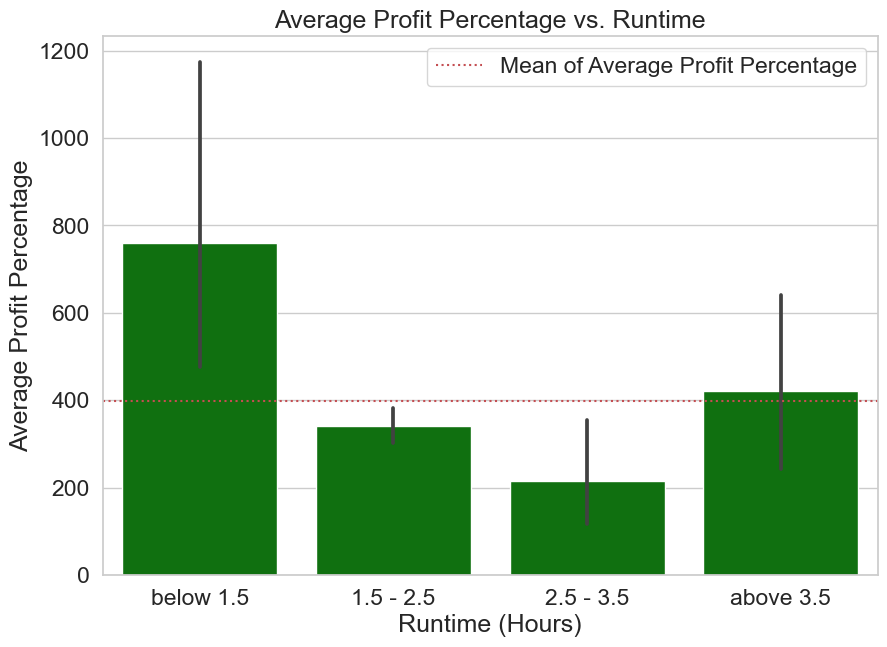

In [33]:
fix, ax = plt.subplots()
sns.set(rc={"figure.figsize":(10, 7)})
sns.set_theme(style="whitegrid", font_scale=1.5)
plot = sns.barplot(data = binned_df, x = 'runtime_bins', y = 'Profit%',
                   color = 'green').set(title = 'Average Profit Percentage vs. Runtime')
ax.set_xticklabels(["below 1.5","1.5 - 2.5","2.5 - 3.5","above 3.5"])
ax.set_xlabel("Runtime (Hours)")
ax.set_ylabel("Average Profit Percentage")
ax.axhline(y = binned_df['Profit%'].mean(), color='r', linestyle='dotted', label = "Mean of Average Profit Percentage")
ax.legend()
plt.show()

# Recommendation
Based on the above visualizations, if the goal of Computing Vision is higher ratings, we recommend a longer movie runtime of 2.5-3.5 hours. If their goal is higher profits, we recommend a shorter movie runtime of below 1.5 hours.

## Cleaning up genres column and initial visualizations with transformed data
We cleaned genres because one movie can have multiple genres. There was no indication of what a primary genre was, so there was no way to decipher which was the primary so we made sure to give each of the movies all of their respective genres so that we could determine which performed the best in terms of profit percentage and audience ratings. 

This allowed us to group the genres together and examine features amongst each individual genre and draw conclusions based on the results.

In [34]:
# Split genres into new rows
master_df_genre = master_df.copy()

# Used later for sub-genre analysis
master_df_genre_sg = merged
master_df_genre_sg = master_df_genre_sg[master_df_genre_sg['genres'].str.contains('Documentary',na=False) 
                                        | master_df_genre_sg['genres'].str.contains('Biography',na=False) 
                                        | master_df_genre_sg['genres'].str.contains('History',na=False)]

master_df_genre['genres'] = master_df_genre['genres'].map(lambda x: x.split(',') if type(x) is str else x)
master_df_genre_sg['genres'] = master_df_genre_sg['genres'].map(lambda x: x.split(',') if type(x) is str else x)
master_df_genre = master_df_genre.explode('genres')
master_df_genre_sg = master_df_genre_sg.explode('genres')

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\2719726769.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df_genre_sg['genres'] = master_df_genre_sg['genres'].map(lambda x: x.split(',') if type(x) is str else x)


In [35]:
# Drop irrelevant genres
drop_list = ['Talk-Show','Reality-TV','Game-Show','News', 'Short']

for dropg in drop_list:
    master_df_genre = master_df_genre[master_df_genre['genres'] != dropg].copy()
    master_df_genre_sg = master_df_genre_sg[master_df_genre_sg['genres'] != dropg].copy()
    
# Merge Musical and Musically
master_df_genre['genres'] = master_df_genre['genres'].map(lambda x: x if x != 'Music' else 'Musical')
master_df_genre_sg['genres'] = master_df_genre_sg['genres'].map(lambda x: x if x != 'Music' else 'Musical')

# Average Overall Rating by Genre

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\3168255354.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  master_df_genre_grp = master_df_genre.groupby(['genres']).mean().sort_values(


[Text(0.5, 0, 'Rating'), Text(0, 0.5, 'Genres')]

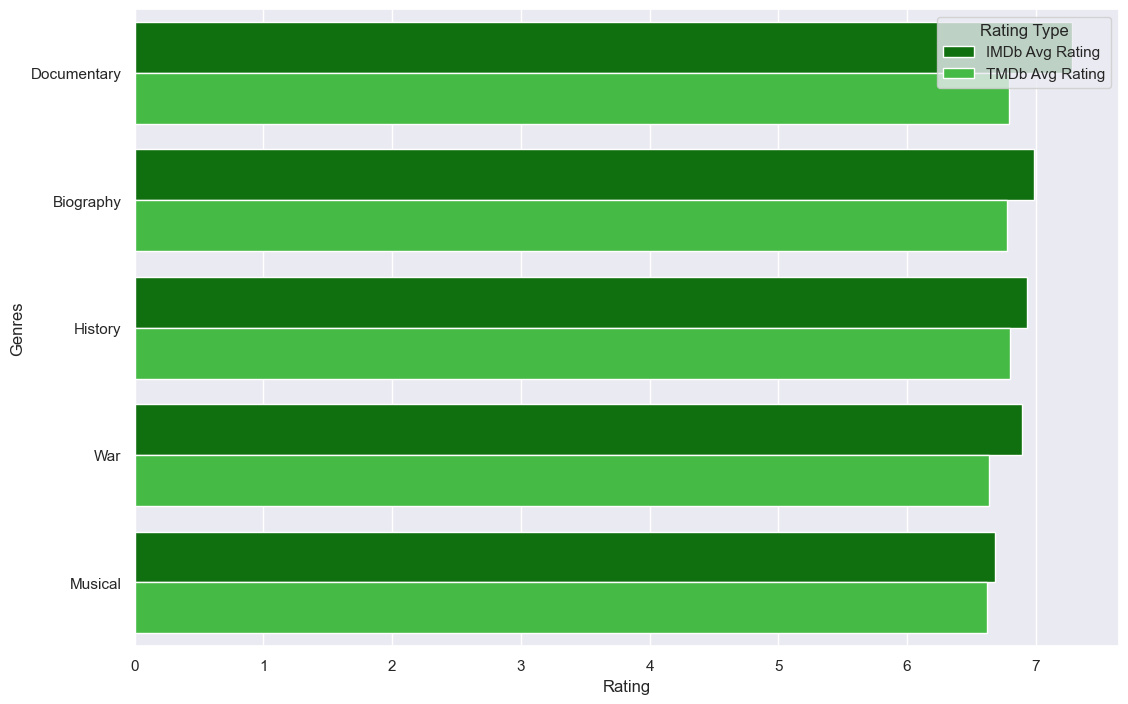

In [36]:
# Get top 5 rated genres
master_df_genre_grp = master_df_genre.groupby(['genres']).mean().sort_values(
                    by=['averagerating','vote_average'], ascending=False).head()

# Rename columns for plot
master_df_genre_grp = master_df_genre_grp.rename(
    columns={'averagerating':'IMDb Avg Rating','vote_average':'TMDb Avg Rating'})

# Convert to vertical format for seaborn
master_df_genre_grp = master_df_genre_grp[
    ['IMDb Avg Rating','TMDb Avg Rating']].stack().to_frame('value').reset_index()

master_df_genre_grp.rename(columns={'level_1':'Rating Type'},inplace=True)

# Plot
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.barplot(palette=['green','limegreen'],data=master_df_genre_grp,orient='h',y='genres',
            x='value',hue='Rating Type').set(xlabel='Rating',ylabel='Genres')

# Plotting sub-genres by average rating

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\1723305244.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'averagerating':'Avg Rating'}).groupby(['Documentary Sub-genres']).mean().sort_values(


<Axes: xlabel='Avg Rating', ylabel='Documentary Sub-genres'>

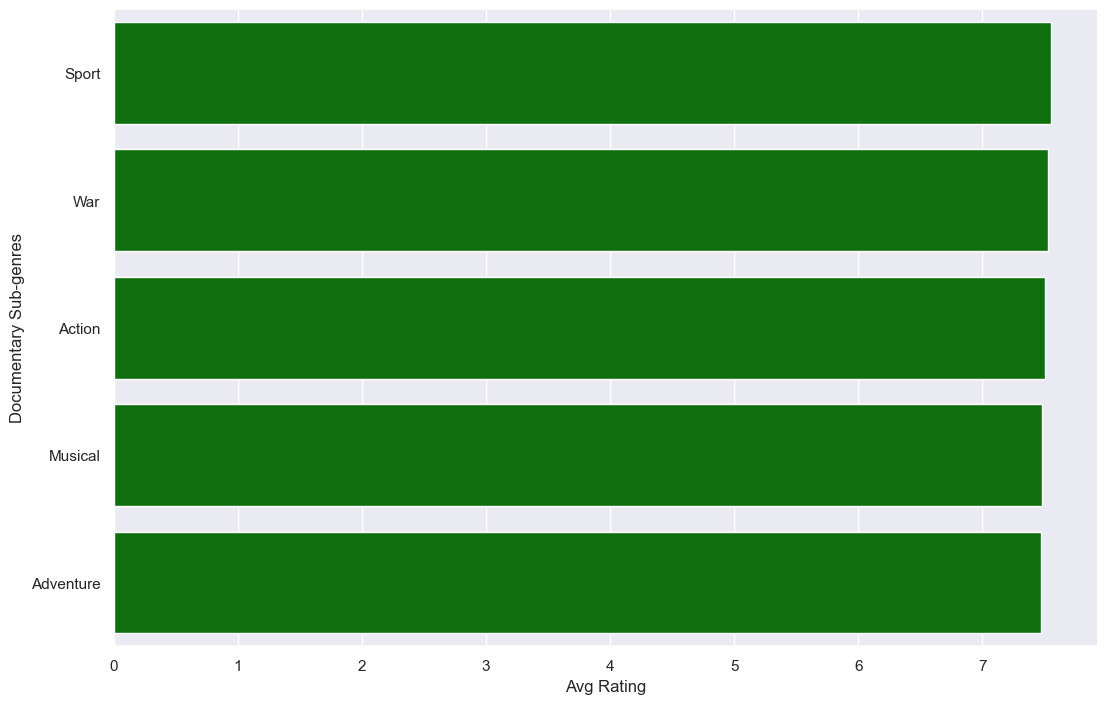

In [37]:
# Sub genre count
df_doc = master_df_genre_sg.drop(master_df_genre_sg[(master_df_genre_sg['genres'] == 'Biography')
                                                    | (master_df_genre_sg['genres'] == 'History')].index)

df_bio = master_df_genre_sg.drop(master_df_genre_sg[(master_df_genre_sg['genres'] == 'Documentary') 
                                                    | (master_df_genre_sg['genres'] == 'History')].index)

df_his = master_df_genre_sg.drop(master_df_genre_sg[(master_df_genre_sg['genres'] == 'Documentary') 
                                                    | (master_df_genre_sg['genres'] == 'Biography')].index)

#
df_doc = df_doc[df_doc['genres'] != 'Documentary']
df_bio = df_bio[df_bio['genres'] != 'Biography']
df_his = df_his[df_his['genres'] != 'History']

# Plot
sns.barplot(data=df_doc.rename(columns={'genres':'Documentary Sub-genres',
            'averagerating':'Avg Rating'}).groupby(['Documentary Sub-genres']).mean().sort_values(
            by='Avg Rating', ascending=False).head().reset_index(),
            y='Documentary Sub-genres',orient='h',x='Avg Rating',color='green')

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\2840321267.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'averagerating':'Avg Rating'}).groupby(['Biography Sub-genres']).mean().sort_values(


<Axes: xlabel='Avg Rating', ylabel='Biography Sub-genres'>

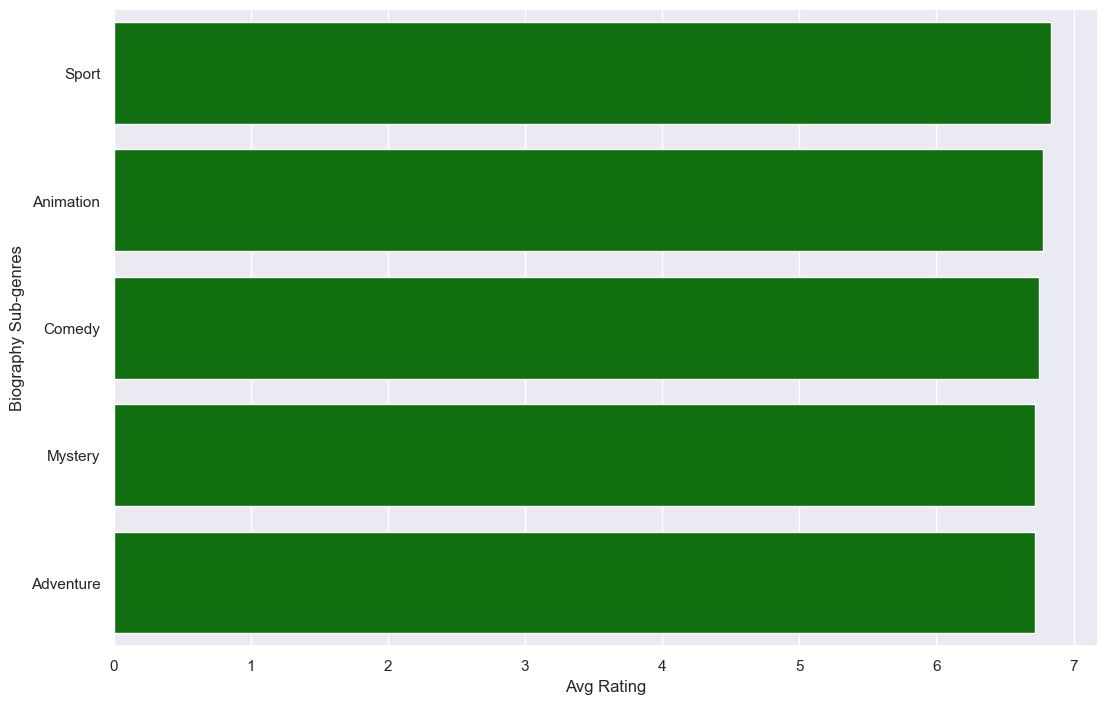

In [38]:
sns.barplot(data=df_bio.rename(columns={'genres':'Biography Sub-genres',
            'averagerating':'Avg Rating'}).groupby(['Biography Sub-genres']).mean().sort_values(
            by='Avg Rating',ascending=False).head().reset_index(),
            y='Biography Sub-genres',orient='h',x='Avg Rating',color='green')

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\2989694421.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'averagerating':'Avg Rating'}).groupby(['History Sub-genres']).mean().sort_values(


<Axes: xlabel='Avg Rating', ylabel='History Sub-genres'>

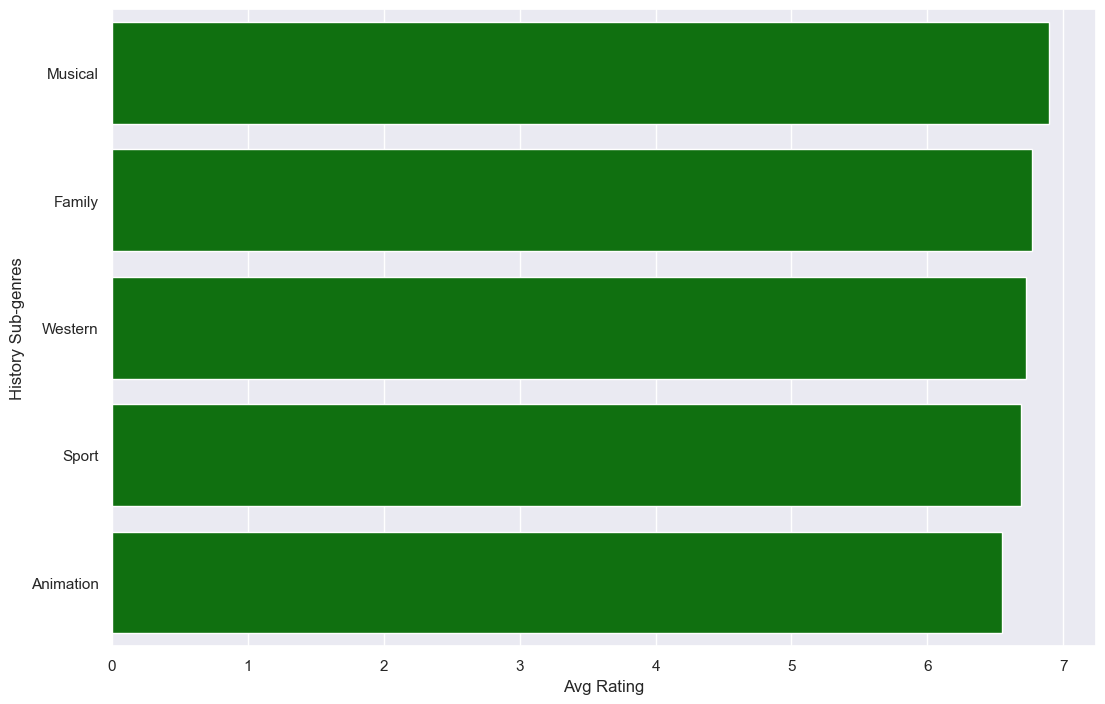

In [39]:
sns.barplot(data=df_his.rename(columns={'genres':'History Sub-genres',
            'averagerating':'Avg Rating'}).groupby(['History Sub-genres']).mean().sort_values(
            by='Avg Rating', ascending=False).head().reset_index(),
            y='History Sub-genres',orient='h',x='Avg Rating',color='green')

In [40]:
master_df = master_df_genre.copy()

In [41]:
master_df_genre_grp = master_df.groupby(['genres'])

# Genre Visualizations:

In [42]:
#Create Group of top 5 profit percentage genres in order to plot
new_df = master_df.copy()
new_df_top_5 = master_df[(master_df.genres == "Horror") | (master_df.genres == "Mystery") |
                         (master_df.genres == "Romance") | (master_df.genres == "Thriller") 
                         | (master_df.genres == "Sport")]
new_df_genre_grp = new_df_top_5.groupby("genres")


''

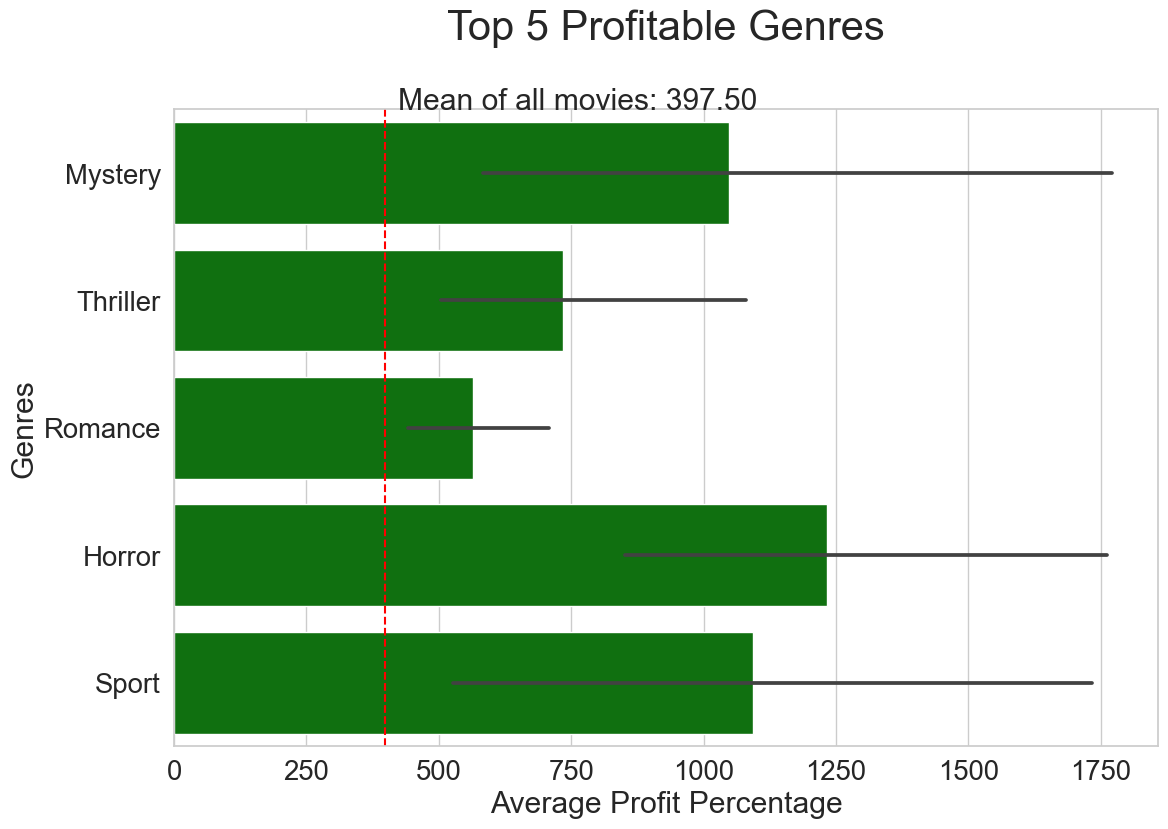

In [43]:
#Create Seaborn plot of the highest profiting genres 
sns.set_theme(style="whitegrid",palette= "deep", font_scale=1.8)

ax = sns.barplot(data=new_df_top_5,y='genres',x='Profit%', color = "green", orient = 'h')
ax.set_ylabel("Genres")
ax.set_xlabel("Average Profit Percentage")
ax.set_title("Top 5 Profitable Genres", size = 30, pad = 50)
ax.axvline(master_df["Profit%"].mean(), ls = '--', color = "red")
plt.text(master_df["Profit%"].mean()+25,-.5,  "Mean of all movies: {:.2f}".format(master_df["Profit%"].mean()))
;

# Recommendation:
Based on these visualizations we recommend that Computing Vision focuses on Mystery, Thriller, Romance, Horror, and Sport genres if their goal is profit percentages.

If there goal is audience ratings and reception, we reccomend that Computing Vision focuses on History, War, Musical, Biography, and Documentary genre movies. 



# Budget Visualizations

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\162721585.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0",'50,000,000', "100,000,000",


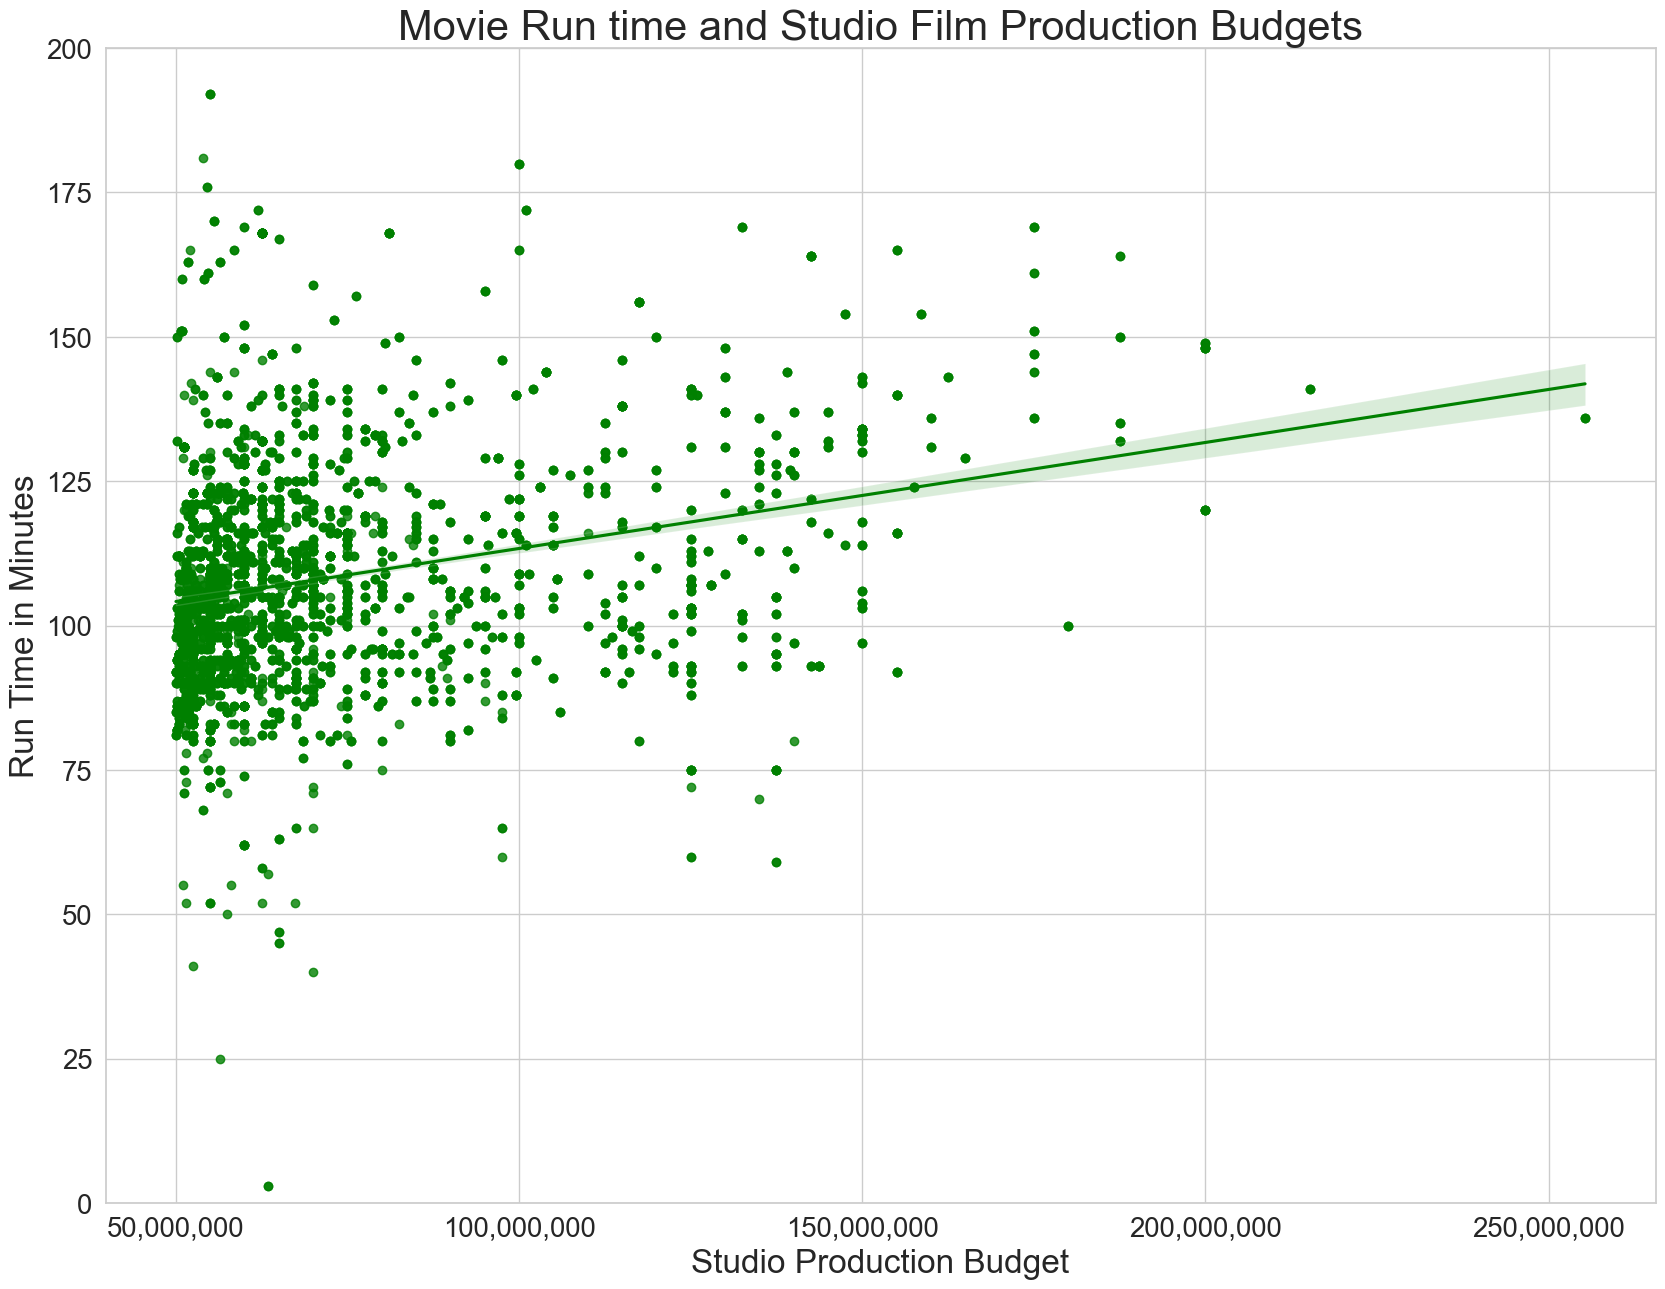

In [44]:
#Creating a scatter plot with a line of best fit
sns.set(rc={"figure.figsize":(20, 15)})
sns.set_theme(style="whitegrid", font_scale=1.8)
ax = sns.regplot(x="production_budget",
                    y="runtime_minutes",
                    data=master_df,
                    color = "green")
# Set y limit as no movies are over 200 minutes
plt.ylim(0, 200)
plt.title("Movie Run time and Studio Film Production Budgets",size =30 )
plt.xlabel("Studio Production Budget", size = 24)
plt.ylabel("Run Time in Minutes", size = 24)
#Create ticks for x axis based on budget range
ax.set_xticklabels(["0",'50,000,000', "100,000,000",
                    "150,000,000","200,000,000","250,000,000",
                    '300,000,000',"350,000,000","400,000,000","450,000,000"]);

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\2541216104.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0",'50,000,000', "100,000,000",


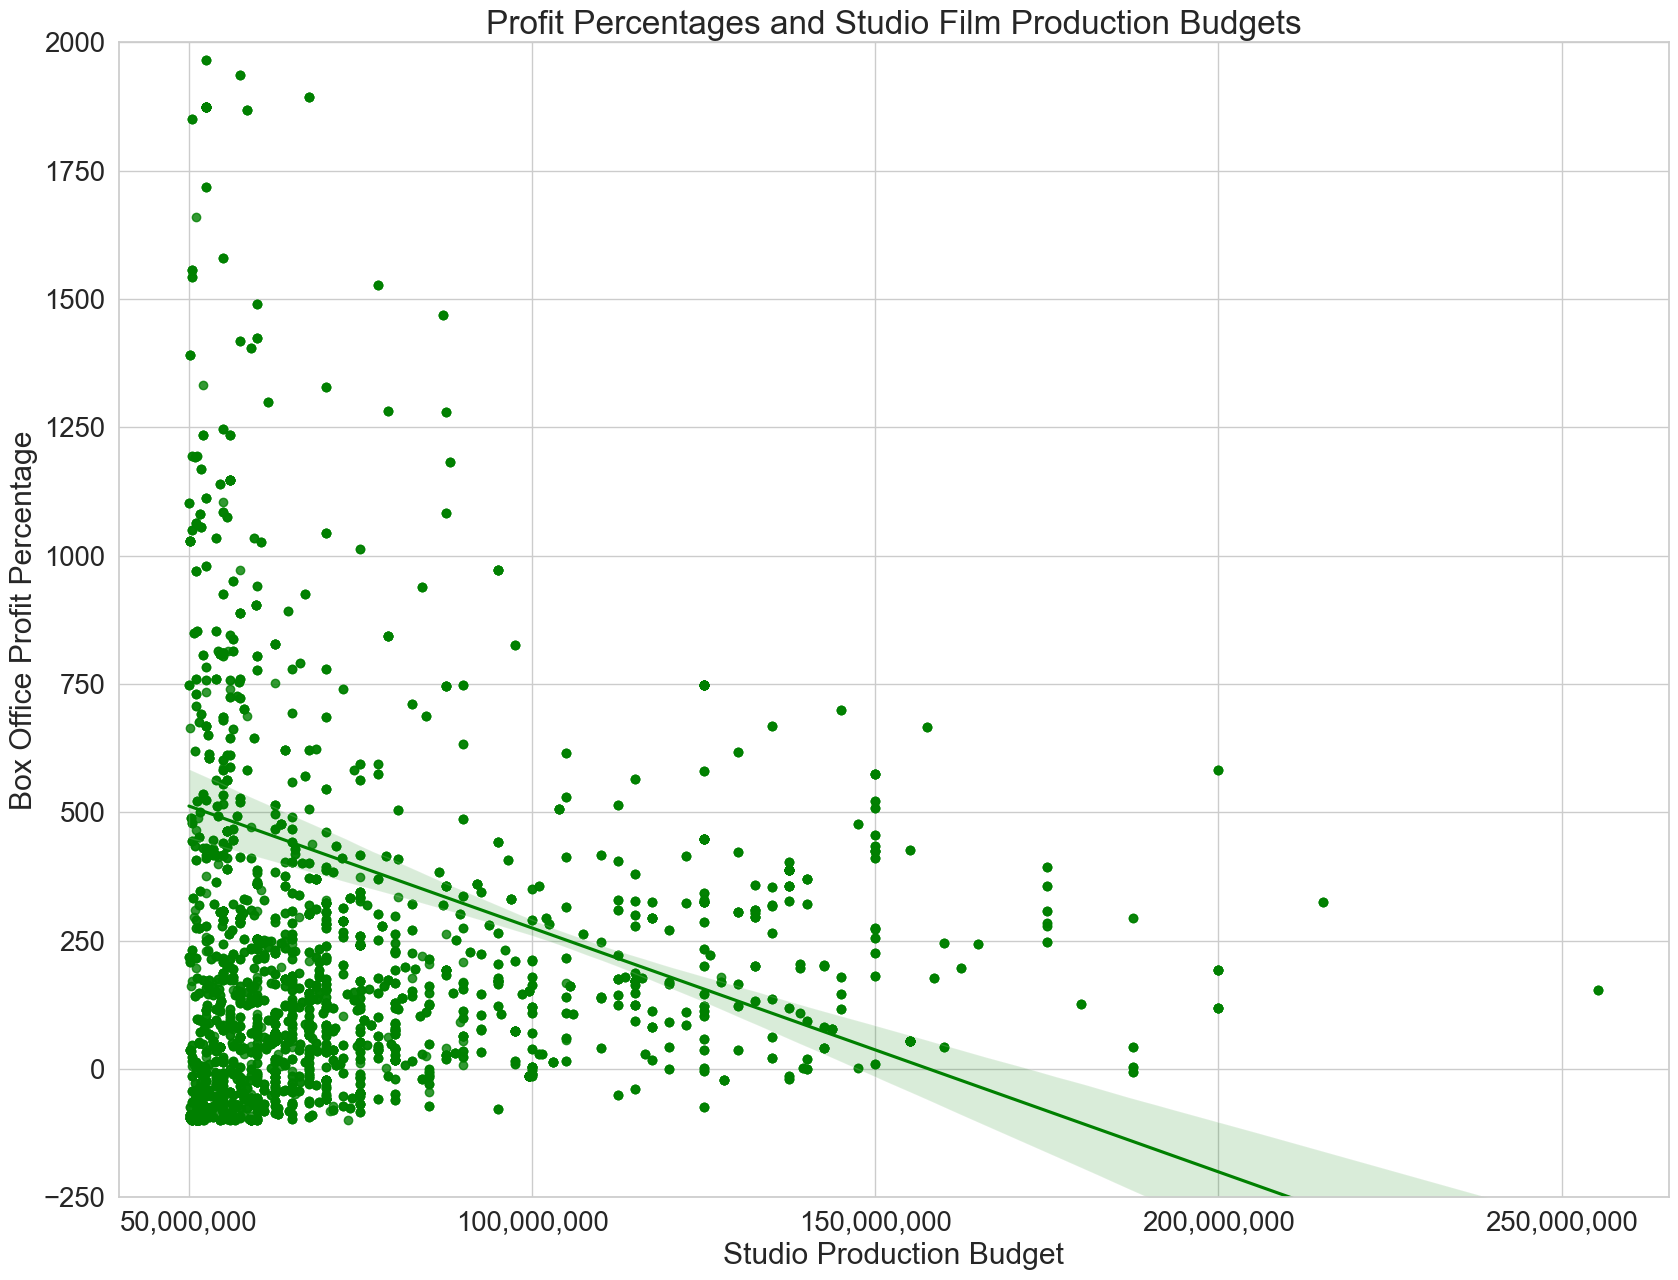

In [45]:
#Creating a scatter plot with a line of best fit

sns.set_theme(style="whitegrid", font_scale=1.8)
ax = sns.regplot(x="production_budget",
                    y="Profit%",
                    data=master_df,
                    color = "green")
plt.ylim(-250, 2000)
plt.title("Profit Percentages and Studio Film Production Budgets",size =24 )
plt.xlabel("Studio Production Budget")
plt.ylabel("Box Office Profit Percentage")
#Create ticks for x axis based on budget range
ax.set_xticklabels(["0",'50,000,000', "100,000,000",
                    "150,000,000","200,000,000","250,000,000",
                    '300,000,000',"350,000,000","400,000,000","450,000,000"]);

# Recommendation:
Based on these visualizations we recommend that Computing Vision focuses on smaller budgets if their goal is profit percentages.

If there goal is audience ratings and reception, and budget is less of a concern, then we recommend using larger budgets to achieve this. 

# Calculating sample statistics like correlation to determine general trends among key quantitative variables of interest

In [46]:
master_df.production_budget.corr(master_df.Total_Profit)

0.6452383068974963

In [47]:
master_df.production_budget.corr(master_df.averagerating)

0.14159000612679057

In [48]:
master_df.production_budget.corr(master_df['Profit%'])

-0.09983003381523183

In [49]:
master_df.runtime_minutes.corr(master_df.averagerating)

0.2647187702866116

In [50]:
master_df.runtime_minutes.corr(master_df["Profit%"])

-0.07883337549573378

# Exploratory Statistical Testings on genres 

## Construct new data sets using genres of interest to create samples to compare to the general population

Explored several different variables and their statistical relationship with the general movies population to determine relationships of interest and determine the extent of these relationships.

Given the nature of genres being samples of our general dataset we settled on one sample t-tests to determine if individual samples were statistically higher than the general movie population.

For all five of these tests, we had the same hypotheses

Null-Hypothesis: The average profit percentage of each genre was less than or equal to the rest of the movies

Alternative Hypothesis: The average profit percentage of each genre was greater than the rest of the movies.

All of our testing revealed that these genres have a statistically higher profit percentage at the alpha level of .05.

## Statistical testing for horror genre with variables: Profit Percentage

In [51]:
df_horror = master_df[master_df.genres == "Horror"]

In [52]:
df_horror["Profit%"].mean()

1233.1011563119691

In [53]:
stats.ttest_1samp(df_horror['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

TtestResult(statistic=3.5384016386399404, pvalue=0.0005037350881016739, df=194)

In [54]:
stats.t.interval(alpha = .95, df = len(df_horror)-1, loc = df_horror["Profit%"].mean(), scale = df_horror["Profit%"].std())

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\1717214429.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha = .95, df = len(df_horror)-1, loc = df_horror["Profit%"].mean(), scale = df_horror["Profit%"].std())


(-5257.722730797311, 7723.925043421249)

## Statistical testing for mystery genre with variable: Profit Percentage

In [55]:
df_mystery = master_df[master_df.genres == "Mystery"]

In [56]:
df_mystery["Profit%"].mean()

1047.7253384458588

In [57]:
stats.t.interval(alpha = .95, df = len(df_mystery)-1, loc = df_mystery["Profit%"].mean(), 
                 scale =df_mystery["Profit%"].std())

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\1663007215.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha = .95, df = len(df_mystery)-1, loc = df_mystery["Profit%"].mean(),


(-6319.355459118147, 8414.806136009865)

In [58]:
stats.ttest_1samp(df_mystery['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

TtestResult(statistic=2.0138774368039543, pvalue=0.04603971305391123, df=133)

In [59]:
#Statistically cheaper to make than other movies 

In [60]:
#mystery movies are statistically lower rated but statistically more profitable 

## Statistical testing for Sport genre with variables: Profit Percentage

In [61]:
df_sport = master_df[master_df.genres == "Sport"]

In [62]:
df_sport["Profit%"].mean()

1093.128317480592

In [63]:
stats.t.interval(alpha = .95, df = len(df_sport)-1, loc = df_sport["Profit%"].mean(), 
                 scale =df_sport["Profit%"].std())

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\1759420779.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha = .95, df = len(df_sport)-1, loc = df_sport["Profit%"].mean(),


(-3057.282009395951, 5243.538644357135)

In [64]:
stats.ttest_1samp(df_sport['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

TtestResult(statistic=2.2454402542510925, pvalue=0.029813618814152426, df=44)

## Statistical testing for Thriller genre with variables: Profit Percentage

In [65]:
df_thriller = master_df[master_df.genres == "Thriller"]

In [66]:
df_thriller["Profit%"].mean()

733.7430978347663

In [67]:
stats.t.interval(alpha = .95, df = len(df_thriller)-1, loc = df_thriller["Profit%"].mean(), 
                 scale =df_thriller["Profit%"].std())

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\349095963.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha = .95, df = len(df_thriller)-1, loc = df_thriller["Profit%"].mean(),


(-4388.160373276534, 5855.646568946067)

In [68]:
stats.ttest_1samp(df_thriller['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

TtestResult(statistic=2.2675385944072293, pvalue=0.024049969365415032, df=308)

## Statistical testing for Romance genre with variables: Profit Percentage

In [69]:
df_romance = master_df[master_df.genres == "Romance"]

In [70]:
df_romance["Profit%"].mean()

563.7883368777519

In [71]:
stats.t.interval(alpha = .95, df = len(df_romance)-1, loc = df_romance["Profit%"].mean(), 
                 scale =df_romance["Profit%"].std())

C:\Users\usethuraman\AppData\Local\Temp\ipykernel_25944\2409525155.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha = .95, df = len(df_romance)-1, loc = df_romance["Profit%"].mean(),


(-1392.5182404865009, 2520.094914242005)

In [72]:
stats.ttest_1samp(df_romance['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

TtestResult(statistic=2.444339916049215, pvalue=0.01532469962099076, df=213)

# Recommendation: 
Following our plotting of the average profit percentages against genres, we concluded these genres have statistically higher profit percentages. As a result, if Computing Vision's focus is on profit percentages, then we advise focusing on these 3 genres. 

# Conclusion:
After joining together 4 popular datasets with information regardin movie performance across ratings and financials we have come up with the following business insights based on what Computing Vision's priorities could be. 

## Audience Ratings and Reception
If their main priority is for high quality and received films from audiences, then we recommend using a run time between 2.5-3.5 hours in non-fiction genres like Documentary, History, and Biograph, using a higher production budget to achieve this goal.

## Profit Percentages:
If their main priority is profit percentages, then we recommend using a shorter run time less than 1.5 hours in genres like horror, mystery, or sport, and to use a lower production budget to achieve this goal. 
